In [12]:
import os
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes/customer_personality_analysis'

In [13]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [14]:
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [ ]:
# Load Data
df = pd.read_csv("cleaned_marketing_campaign.csv")

# Drop non-numeric & ID column
df = df.drop(columns=["ID", "Date Of Enrollment"])

# Encode categorical features
categorical_cols = ["Education Level", "Marital Status"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Standardize numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

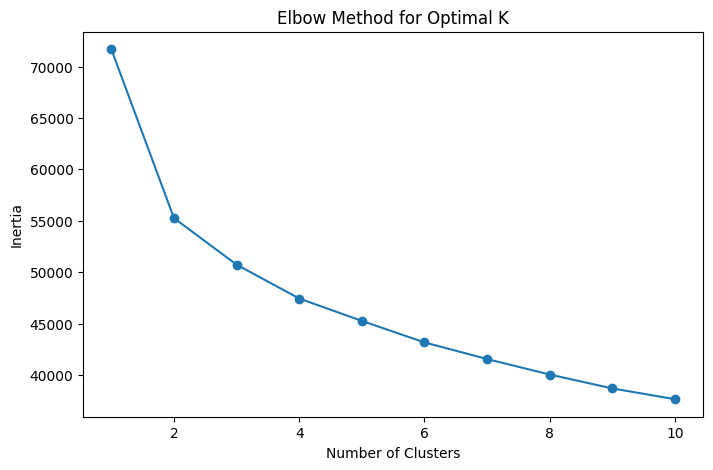

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

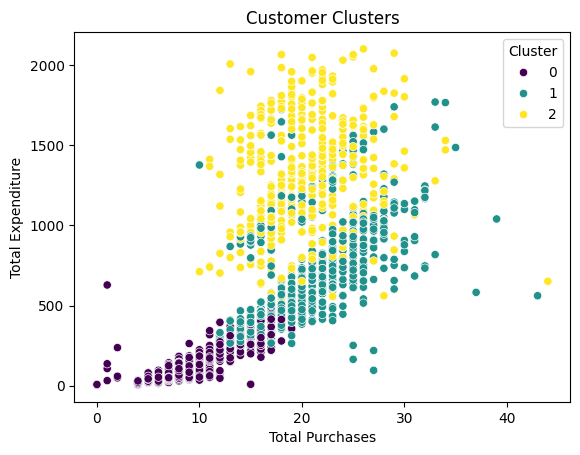

In [ ]:
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply K-Means with optimal K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize Clusters
sns.scatterplot(x=df["Total Purchases"], y=df["Total Expenditure"], hue=df["Cluster"], palette="viridis")
plt.title("Customer Clusters")
plt.show()

# Save results
df.to_csv("clustered_data.csv", index=False)


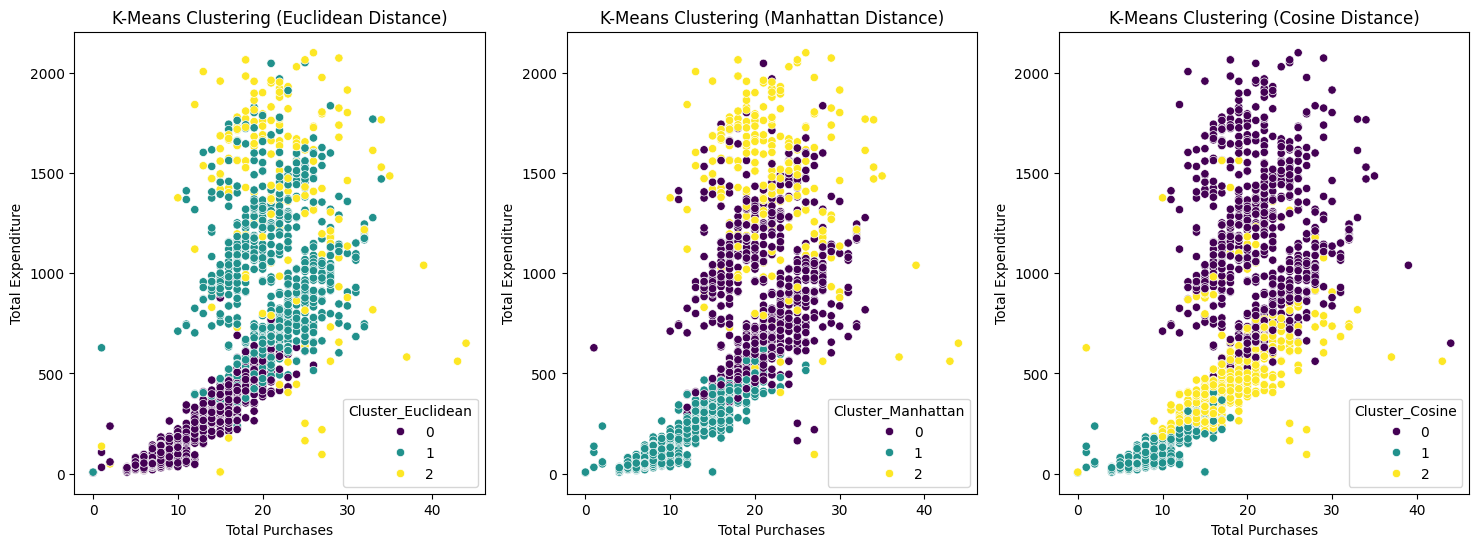

In [ ]:
# Define function to apply K-Means with different distance metrics
def kmeans_with_distance(metric, df_scaled, n_clusters=3):

    dist_matrix = pairwise_distances(df_scaled, metric=metric)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(dist_matrix)

    return cluster_labels

# Try different distance metrics
metrics = ["euclidean", "manhattan", "cosine"]
clusters = {}

for metric in metrics:
    clusters[metric] = kmeans_with_distance(metric, df_scaled)

# Assign new cluster labels to dataframe
df["Cluster_Euclidean"] = clusters["euclidean"]
df["Cluster_Manhattan"] = clusters["manhattan"]
df["Cluster_Cosine"] = clusters["cosine"]

# Plot results for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.scatterplot(x=df["Total Purchases"], y=df["Total Expenditure"],
                    hue=df[f"Cluster_{metric.capitalize()}"], palette="viridis", ax=axes[i])
    axes[i].set_title(f"K-Means Clustering ({metric.capitalize()} Distance)")

plt.show()